<a href="https://colab.research.google.com/github/KLeeDE/PUS2020_KLee/blob/master/Project/multiple_depth_DE_NewCastle_cblock_social_(GGD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FEMA Depth Grid (Raster Data)**

## Raster data description


County
*   10001C: Kent County
*   10003C: New Castle County
*   10005C: Sussex County

Flood hazard is defined by a relation between depth of flooding and the annual chance of inundation greater than that depth.

Depth grid is defined by **the percent annual chance floods**. This is usually only **the 1% annual chance flood**.


**Type of Layer**

*   **WSE_xxxxx** (Water Surface Elevation): WSE for the xxxx flood event or scenario. This raster is required to be produced for riverine Flood Risk Projects.
*   **CstDpthxxxpct**: Coastal flood depth for the xxx percent
annual chance flood event. This raster is
required to be produced for coastal Flood
Risk Projects. [Feet]
*   **Depth_xxxxxx**: Flood Depth for the xxxxxx riverine flood
event. This raster is required to be
produced for riverine Flood Risk Projects. [Feet]
*   **Dpth_xxxxxxxx**: Flood Depth for the xxxxxxxx dam release
or levee scenario. This is an enhanced
raster. [Feet]
*   **Pct30yrChance**: Percent chance of flooding over a 30-year
period. This raster is required to be
produced for riverine Flood Risk Projects. [Percent]
*   **PctAnnChance**: Percent annual chance of flooding. This
raster is required to be produced for
riverine Flood Risk Projects. [Percent]


**List of Raster Dataset** 
*   CstDpth_01pct : Raster dataset of flood depth for a coastal 1% event. (1-percent-annualchance) [Feet]
*   Depth_01pct : Raster dataset of flood depth for a 1% event [Feet]
*   Depth_02pct : Raster dataset of flood depth for a 2% event [Feet]
*   Depth_04pct : Raster dataset of flood depth for a 4% event [Feet]
*   Depth_10pct : Raster dataset of flood depth for a 10% event [Feet]
*   Depth_0_2pct : Raster dataset of flood depth for a 0.2% event [Feet]
*   Depth_01plus : Raster dataset of flood depth for a 1% plus event [Feet]
*   Pct30yrChance : Raster dataset of the Percent 30yr Chance Grid. Percent chance of flooding over a 30-year period. This raster is required to be produced for riverine Flood Risk Projects.[Percent]
*   PctAnnChance : Raster dataset of the Percent Annual Chance Grid. Percent annual chance of flooding. This raster is required to be produced for riverine Flood Risk Projects.[Percent]
*   WSE_01pct : Raster dataset of the water surface for a 1% event [Feet]
*   WSE_02pct : Raster dataset of the water surface for a 2% event [Feet]
*   WSE_04pct : Raster dataset of the water surface for a 4% event [Feet]
*   WSE_10pct : Raster dataset of the water surface for a 10% event [Feet]
*   WSE_0_2pct : Raster dataset of the water surface for a 1% plus event [Feet]
*   WSE_01plus : Raster dataset of the water surface for a 1% plus event [Feet]

NOTE: Hillshade is a raster dataset for the hillshade of the watershed shown on the FRM


Unit [Link](https://www.fema.gov/media-library-data/1524249062040-8a315833d69131560239507668fa779b/Flood_Risk_Database_Technical_Reference_Feb_2018.pdf)




# Raster data processing

In [ ]:
# -- mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# -- install geospatial packages
!sudo apt install libspatialindex-dev
!pip install rtree
!pip install geopandas

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 3s (168 kB/s)
debconf: unable to initialize frontend: Dialog
deb

In [ ]:
import time
import geopandas as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gdal
from gdalconst import *
from shapely.geometry import Point
from collections import Counter

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (15,10)

## Set filename

In [ ]:
# -- set filename : 1% depth / DE / coastal area 
# -- Kent (10001C)
fname1C_Cst_Dpth01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Kent/FRD_10001C_Coastal_GeoTIFFS_20140502/10001C_Coastal_CstDpth01pct.tif"
# -- New Castle (10003C)
fname3C_Cst_Dpth01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_10003C_Coastal_GeoTIFFS_20140516/10003C_Coastal_CstDpth01pct.tif"
# -- Sussex (1005C)
fname5C_Cst_Dpth01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Sussex/FRD_10005C_Coastal_GeoTIFFS_20140509/10005C_Coastal_CstDpth01pct.tif"

In [ ]:
# -- set filename : 1%, 2%, 4%, 10%, ann/30yr depth / DE / all area 

# -- depth_0_2pct
fname_depth_0_2pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/depth_0_2PCT.tif"
# -- depth_01pct
fname_depth_01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/depth_01PCT.tif"
# -- depth_02pct 
fname_depth_02pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/depth_02PCT.tif"
# -- depth_04pct
fname_depth_04pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/depth_04PCT.tif"
# -- depth_10pct
fname_depth_10pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/depth_10PCT.tif"

# # -- Pct30Yrchance
# fname_pct30yrchance = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/Pct30YrChance.tif"
# # -- PctAnnChance
# fname_pctannchance = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/PctAnnChance.tif"

## Create and read in a raster

In [ ]:
# -- create and read in a raster : 1% depth / DE / coastal area  
rast1C_Cst_Dpth01pct = gdal.Open(fname1C_Cst_Dpth01pct, GA_ReadOnly)
rast3C_Cst_Dpth01pct = gdal.Open(fname3C_Cst_Dpth01pct, GA_ReadOnly)
rast5C_Cst_Dpth01pct = gdal.Open(fname5C_Cst_Dpth01pct, GA_ReadOnly)

In [ ]:
# -- create and read in a raster : 1%, 2%, 4%, 10%, ann/30yr depth - DE / all area 
rast_fname_depth_0_2pct = gdal.Open(fname_depth_0_2pct , GA_ReadOnly)
rast_fname_depth_01pct = gdal.Open(fname_depth_01pct, GA_ReadOnly)
rast_fname_depth_02pct = gdal.Open(fname_depth_02pct , GA_ReadOnly)
rast_fname_depth_04pct = gdal.Open(fname_depth_04pct , GA_ReadOnly)
rast_fname_depth_10pct = gdal.Open(fname_depth_10pct , GA_ReadOnly)
# rast_fname_depth_pct30yrchance = gdal.Open(fname_pct30yrchance, GA_ReadOnly)
# rast_fname_depth_pctannchance = gdal.Open(fname_pctannchance, GA_ReadOnly)

## Extract raster to array and sub sample

In [ ]:
# -- extract raster to array : 1% depth / DE / coastal area  
samp=100
arr1C_Cst_Dpth01pct = rast1C_Cst_Dpth01pct.ReadAsArray()[::samp, ::samp]
arr3C_Cst_Dpth01pct = rast3C_Cst_Dpth01pct.ReadAsArray()[::samp, ::samp]
arr5C_Cst_Dpth01pct = rast5C_Cst_Dpth01pct.ReadAsArray()[::samp, ::samp]

In [ ]:
arr3C_Cst_Dpth01pct = rast3C_Cst_Dpth01pct.ReadAsArray()[2000:4500, 5500:8000]

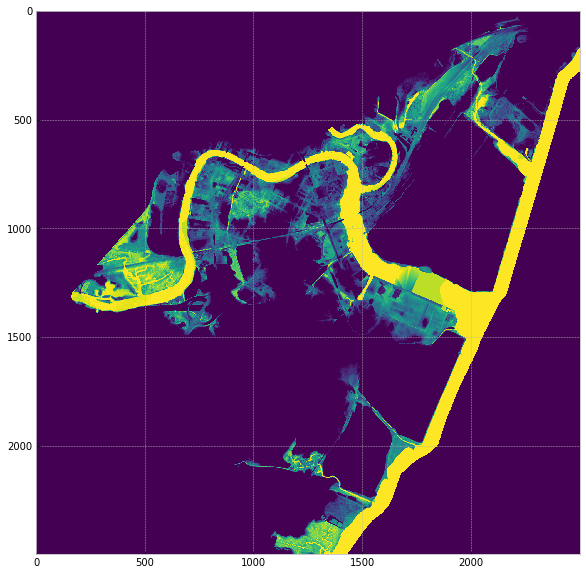

In [ ]:
plt.imshow(arr3C_Cst_Dpth01pct.clip(0, 10), interpolation="nearest")

In [ ]:
rast_fname_depth_01pct.ReadAsArray().shape

(14811, 17912)

In [ ]:
# -- extract raster to array : 1%, 2%, 4%, 10%, ann/30yr depth - DE / all area 
samp=20
arr_dpth_0_2pct = rast_fname_depth_0_2pct.ReadAsArray()[::samp, ::samp]
arr_dpth_01pct = rast_fname_depth_01pct.ReadAsArray()[::samp, ::samp]
arr_dpth_02pct = rast_fname_depth_02pct.ReadAsArray()[::samp, ::samp]
arr_dpth_04pct = rast_fname_depth_04pct.ReadAsArray()[::samp, ::samp]
arr_dpth_10pct = rast_fname_depth_10pct.ReadAsArray()[::samp, ::samp]
# arr_dpth_pct30yr = rast_fname_depth_pct30yrchance.ReadAsArray()[::samp, ::samp]
# arr_dpth_pctann = rast_fname_depth_pctannchance.ReadAsArray()[::samp, ::samp]

In [ ]:
print(arr_dpth_0_2pct.shape)
print(arr_dpth_01pct.shape)
print(arr_dpth_02pct.shape)
print(arr_dpth_04pct.shape)
print(arr_dpth_10pct.shape)

(686, 577)
(741, 896)
(687, 574)
(61, 71)
(687, 574)


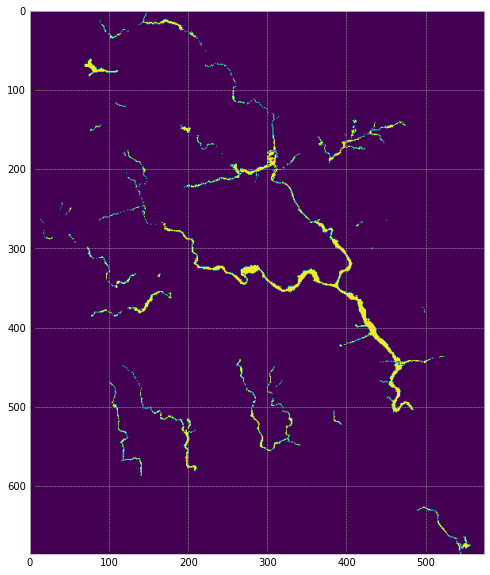

In [ ]:
plt.imshow(arr_dpth_10pct)

## Plot raster and look at shapes of samples

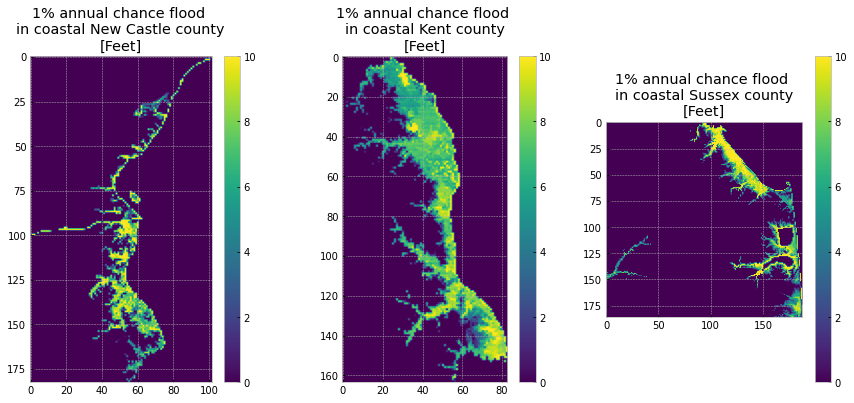

In [ ]:
# -- plot raster : 1% depth / DE / coastal area  
fig_raster, ax = plt.subplots(1, 3, figsize=[15, 6])
im0 = ax[0].imshow(arr3C_Cst_Dpth01pct.clip(0,10))
im1 = ax[1].imshow(arr1C_Cst_Dpth01pct.clip(0,10))
im2 = ax[2].imshow(arr5C_Cst_Dpth01pct.clip(0,10))

ax[0].set_title("1% annual chance flood \nin coastal New Castle county\n[Feet]")
ax[1].set_title("1% annual chance flood \nin coastal Kent county\n[Feet]")
ax[2].set_title("1% annual chance flood \nin coastal Sussex county\n[Feet]")

fig_raster.colorbar(im0, ax=ax[0])
fig_raster.colorbar(im1, ax=ax[1])
fig_raster.colorbar(im2, ax=ax[2])


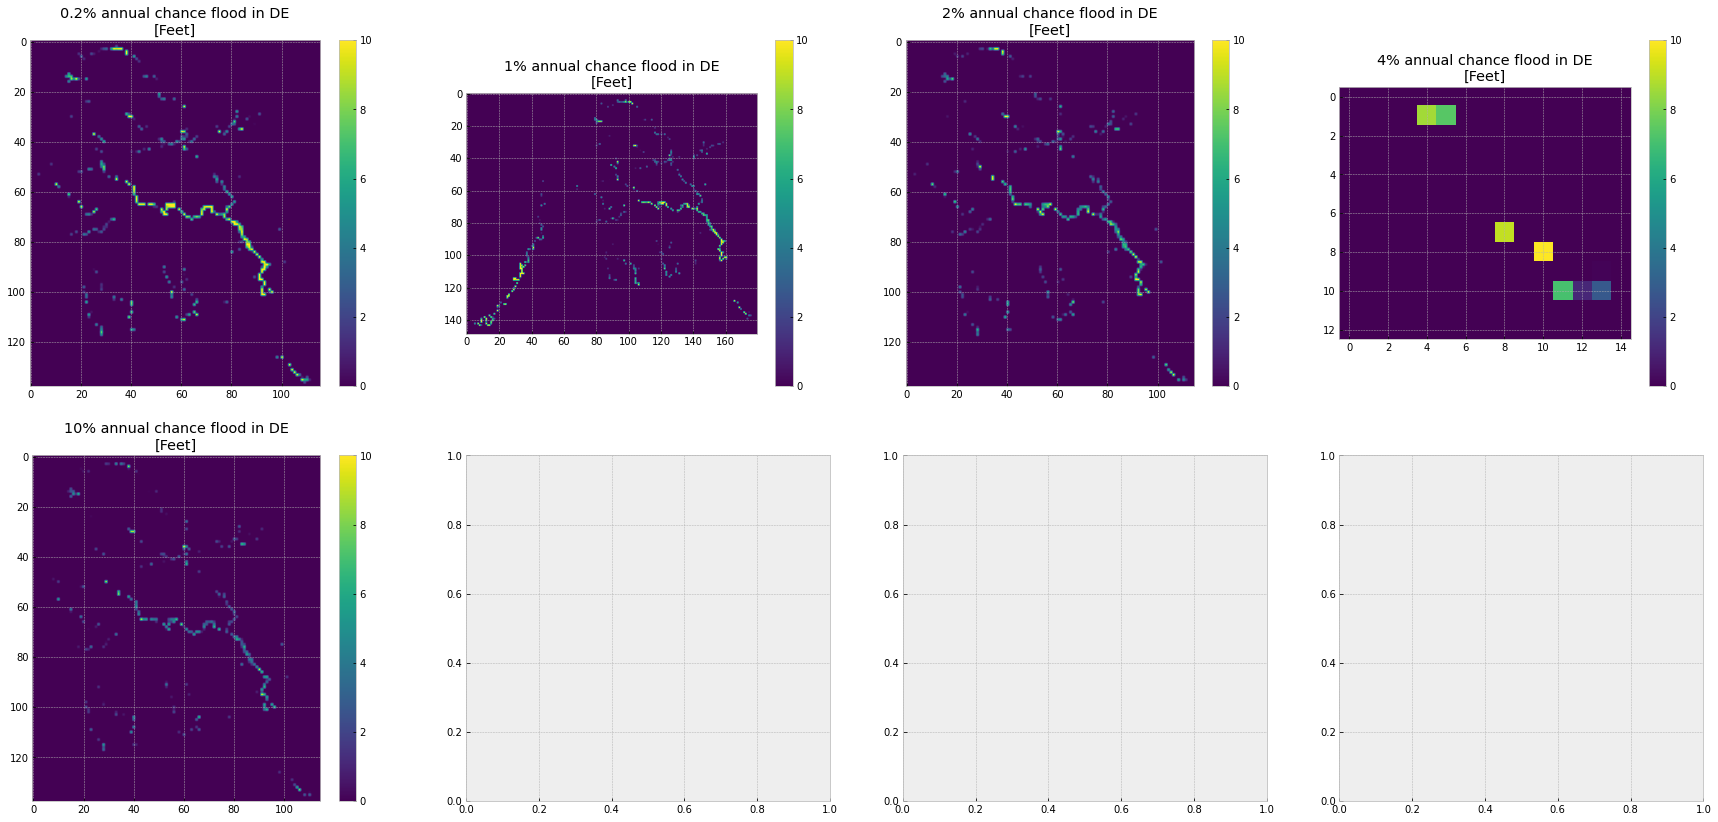

In [ ]:
# -- plot raster : 1%, 2%, 4%, 10%, ann/30yr depth - DE / all area 
fig_raster, ax = plt.subplots(2, 4, figsize=[30, 14])
im0 = ax[0,0].imshow(arr_dpth_0_2pct.clip(0,10))
im1 = ax[0,1].imshow(arr_dpth_01pct.clip(0,10))
im2 = ax[0,2].imshow(arr_dpth_02pct.clip(0,10))
im3 = ax[0,3].imshow(arr_dpth_04pct.clip(0,10))
im4 = ax[1,0].imshow(arr_dpth_10pct.clip(0,10))
#im5 = ax[1,1].imshow(arr_dpth_pct30yr.clip(0,10))
#im6 = ax[1,2].imshow(arr_dpth_pctann.clip(0,10))

ax[0,0].set_title("0.2% annual chance flood in DE\n[Feet]")
ax[0,1].set_title("1% annual chance flood in DE\n[Feet]")
ax[0,2].set_title("2% annual chance flood in DE\n[Feet]")
ax[0,3].set_title("4% annual chance flood in DE\n[Feet]")
ax[1,0].set_title("10% annual chance flood in DE\n[Feet]")
#ax[1,1].set_title("Percent chance of flooding \nover a 30-year period in DE \n[Feet]")
#ax[1,2].set_title("Percent annual chance of flooding in DE\n[Feet]")

fig_raster.colorbar(im0, ax=ax[0,0])
fig_raster.colorbar(im1, ax=ax[0,1])
fig_raster.colorbar(im2, ax=ax[0,2])
fig_raster.colorbar(im3, ax=ax[0,3])
fig_raster.colorbar(im4, ax=ax[1,0])
#fig_raster.colorbar(im5, ax=ax[1,1])
#fig_raster.colorbar(im6, ax=ax[1,2])

In [ ]:
# -- look at shapes of rasters
print(arr1C_Cst_Dpth01pct.shape)
print(arr3C_Cst_Dpth01pct.shape)
print(arr5C_Cst_Dpth01pct.shape)

(164, 83)
(183, 102)
(186, 188)


## Latitude / Longitude

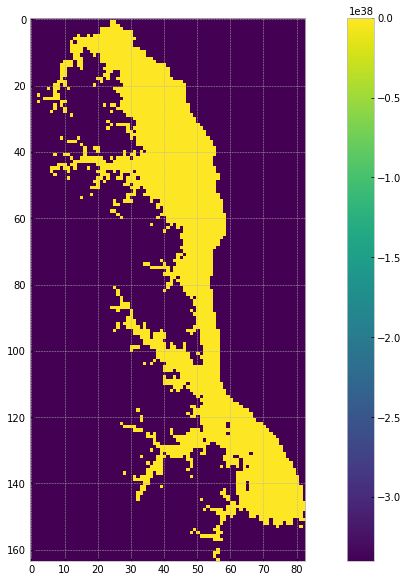

In [ ]:
# Kent county 


# -- read in the meta data file as list of strings: 
mname1c = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Kent/FRD_10001C_Coastal_GeoTIFFS_20140502/10001C_Coastal_CstDpth01pct.tif.xml"
fopen = open(mname1c, "r")
lines = [i for i in fopen]
fopen.close()

# -- get lat lon meta data
for line in lines:
  if "<westBL Sync=\"TRUE\">" in line:
    westBL = float(line.split("<westBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<eastBL Sync=\"TRUE\">" in line:
    eastBL = float(line.split("<eastBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<northBL Sync=\"TRUE\">" in line:
    northBL = float(line.split("<northBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<southBL Sync=\"TRUE\">" in line:
    southBL = float(line.split("<southBL Sync=\"TRUE\">")[2].split("<")[0])

# -- create lat and lon arrays

# -- get number of rows and cols
nrows1c, ncols1c = arr1C_Cst_Dpth01pct.shape

# -- define upperleft and resolution
ul_r = northBL
ul_c = westBL
dr   = (northBL - southBL) / nrows1c
dc   = (eastBL - westBL) / ncols1c

# -- generate a grid of row and col indices
cols1c, rows1c = np.meshgrid(np.arange(ncols1c), np.arange(nrows1c))

lat_grid_1c = ul_r - rows1c * dr
lon_grid_1c = ul_c + cols1c * dc

# plt.imshow(lat_grid_1c)
# plt.colorbar()

# plt.hist(np.log10(arr1C_Cst_Dpth01pct[arr1C_Cst_Dpth01pct > 0]))

lon_grid_1c

dep_grid_1c = arr1C_Cst_Dpth01pct

# now you have all the info you need!
# for example, what is the lat, lon, and depth at row=756 and col=331?
irow = 10
icol = 10
# print(lat_grid_1c[irow, icol])
# print(lon_grid_1c[irow, icol])
# print(dep_grid_1c[irow, icol])

plt.imshow(dep_grid_1c)
plt.colorbar()

# plt.hist(dep_grid_1c[dep_grid_1c > -1e38].flatten())

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:488: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / 0.8)


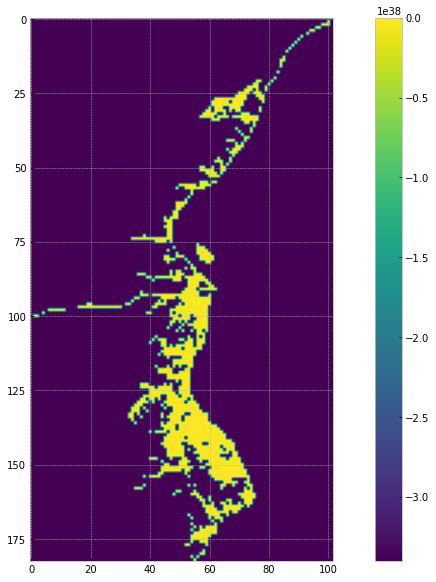

In [ ]:
 # New Castle county

# -- read in the meta data file as list of strings:
mname3c = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_10003C_Coastal_GeoTIFFS_20140516/10003C_Coastal_CstDpth01pct.tif.xml"
fopen = open(mname3c, "r")
lines = [i for i in fopen]
fopen.close()

# -- get lat lon meta data
for line in lines:
  if "<westBL Sync=\"TRUE\">" in line:
    westBL = float(line.split("<westBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<eastBL Sync=\"TRUE\">" in line:
    eastBL = float(line.split("<eastBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<northBL Sync=\"TRUE\">" in line:
    northBL = float(line.split("<northBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<southBL Sync=\"TRUE\">" in line:
    southBL = float(line.split("<southBL Sync=\"TRUE\">")[2].split("<")[0])

# -- create lat and lon arrays

# -- get number of rows and cols
nrows3c, ncols3c = arr3C_Cst_Dpth01pct.shape

# -- define upperleft and resolution
ul_r = northBL
ul_c = westBL
dr   = (northBL - southBL) / nrows3c
dc   = (eastBL - westBL) / ncols3c

# -- generate a grid of row and col indices
cols3c, rows3c = np.meshgrid(np.arange(ncols3c), np.arange(nrows3c))

lat_grid_3c = ul_r - rows3c * dr
lon_grid_3c = ul_c + cols3c * dc

# plt.imshow(lat_grid_3c)
# plt.colorbar()

# plt.hist(np.log10(arr1C_Cst_Dpth01pct[arr1C_Cst_Dpth01pct > 0]))

lon_grid_3c

dep_grid_3c = arr3C_Cst_Dpth01pct

# now you have all the info you need!
# for example, what is the lat, lon, and depth at row=756 and col=331?
irow = 100
icol = 100
# print(lat_grid_3c[irow, icol])
# print(lon_grid_3c[irow, icol])
# print(dep_grid_3c[irow, icol])

plt.imshow(dep_grid_3c)
plt.colorbar()

# plt.hist(dep_grid_3c[dep_grid_3c > -1e38].flatten())

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:488: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / 0.8)


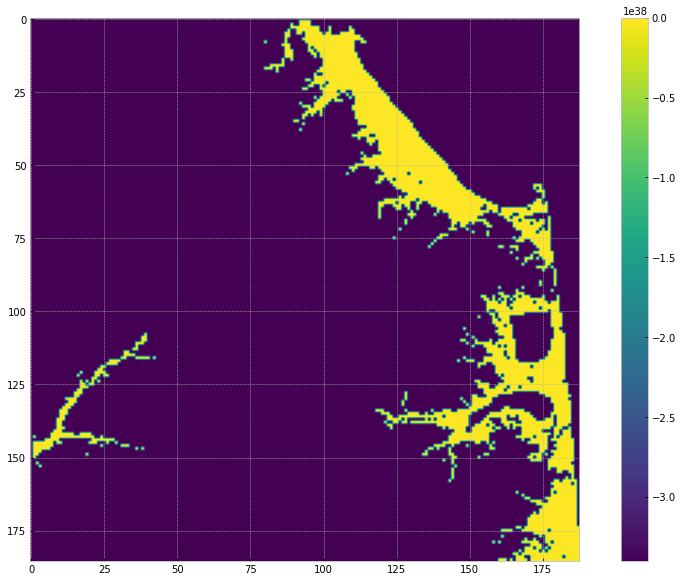

In [ ]:
# Sussex County

# -- read in the meta data file as list of strings: 
mname5c = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Sussex/FRD_10005C_Coastal_GeoTIFFS_20140509/10005C_Coastal_CstDpth01pct.tif.xml"
fopen = open(mname5c, "r")
lines = [i for i in fopen]
fopen.close()

# -- get lat lon meta data
for line in lines:
  if "<westBL Sync=\"TRUE\">" in line:
    westBL = float(line.split("<westBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<eastBL Sync=\"TRUE\">" in line:
    eastBL = float(line.split("<eastBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<northBL Sync=\"TRUE\">" in line:
    northBL = float(line.split("<northBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<southBL Sync=\"TRUE\">" in line:
    southBL = float(line.split("<southBL Sync=\"TRUE\">")[2].split("<")[0])

# -- create lat and lon arrays

# -- get number of rows and cols
nrows5c, ncols5c = arr5C_Cst_Dpth01pct.shape

# -- define upperleft and resolution
ul_r = northBL
ul_c = westBL
dr   = (northBL - southBL) / nrows5c
dc   = (eastBL - westBL) / ncols5c

# -- generate a grid of row and col indices
cols5c, rows5c = np.meshgrid(np.arange(ncols5c), np.arange(nrows5c))

lat_grid_5c = ul_r - rows5c * dr
lon_grid_5c = ul_c + cols5c * dc

# plt.imshow(lat_grid_5c)
# plt.colorbar()

# plt.hist(np.log10(arr1C_Cst_Dpth01pct[arr1C_Cst_Dpth01pct > 0]))

lon_grid_5c

dep_grid_5c = arr5C_Cst_Dpth01pct

# now you have all the info you need!
# for example, what is the lat, lon, and depth at row=756 and col=331?
irow = 100
icol = 100
#print(lat_grid_5c[irow, icol])
#print(lon_grid_5c[irow, icol])
#print(dep_grid_5c[irow, icol])

plt.imshow(dep_grid_5c)
plt.colorbar()

# plt.hist(dep_grid_5c[dep_grid_5c > -1e38].flatten())

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:488: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / 0.8)


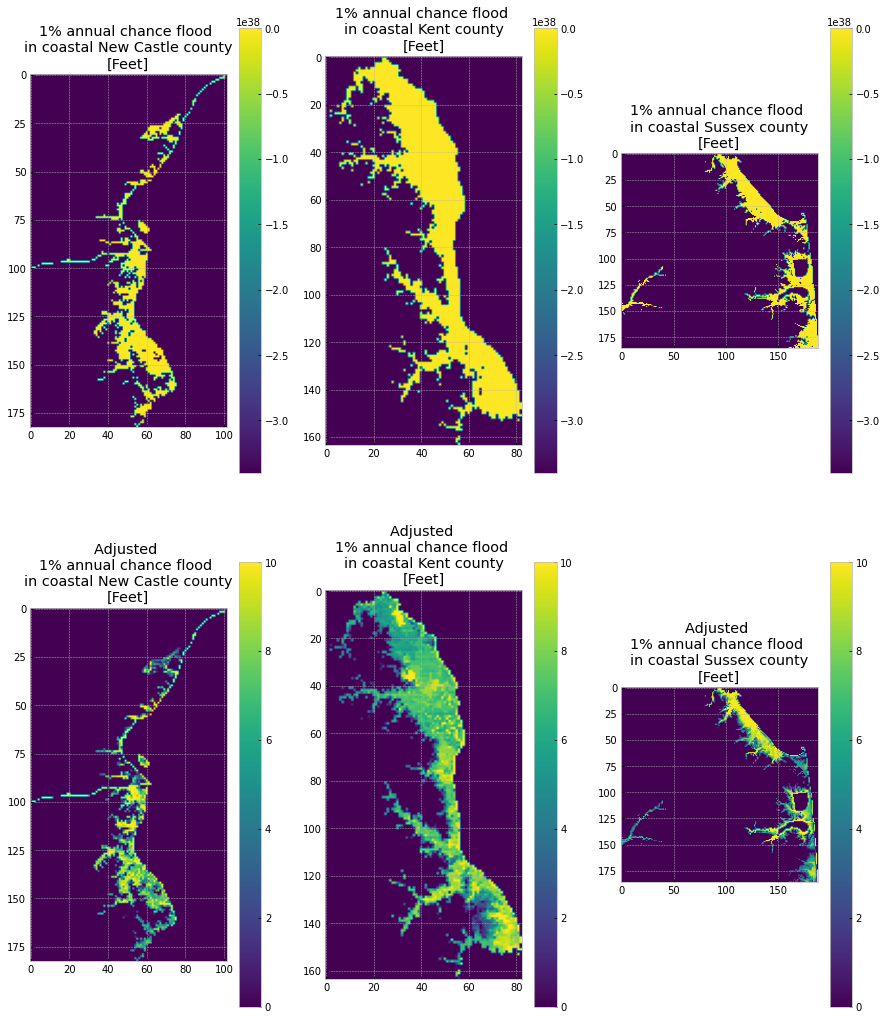

In [ ]:
# -- plot raster 
fig_raster_ed, ax = plt.subplots(2, 3, figsize=[15, 18])
im0 = ax[0,0].imshow(dep_grid_3c)
im1 = ax[0,1].imshow(dep_grid_1c)
im2 = ax[0,2].imshow(dep_grid_5c)
im3 = ax[1,0].imshow(dep_grid_3c.clip(0,10))
im4 = ax[1,1].imshow(dep_grid_1c.clip(0,10))
im5 = ax[1,2].imshow(dep_grid_5c.clip(0,10))

ax[0,0].set_title("1% annual chance flood \nin coastal New Castle county\n[Feet]")
ax[0,1].set_title("1% annual chance flood \nin coastal Kent county\n[Feet]")
ax[0,2].set_title("1% annual chance flood \nin coastal Sussex county\n[Feet]")
ax[1,0].set_title("Adjusted \n1% annual chance flood \nin coastal New Castle county\n[Feet]")
ax[1,1].set_title("Adjusted \n1% annual chance flood \nin coastal Kent county\n[Feet]")
ax[1,2].set_title("Adjusted \n1% annual chance flood \nin coastal Sussex county\n[Feet]")

fig_raster_ed.colorbar(im0, ax=ax[0,0])
fig_raster_ed.colorbar(im1, ax=ax[0,1])
fig_raster_ed.colorbar(im2, ax=ax[0,2])
fig_raster_ed.colorbar(im3, ax=ax[1,0])
fig_raster_ed.colorbar(im4, ax=ax[1,1])
fig_raster_ed.colorbar(im5, ax=ax[1,2])


# Census Block Group & Census Block Shapefile

571


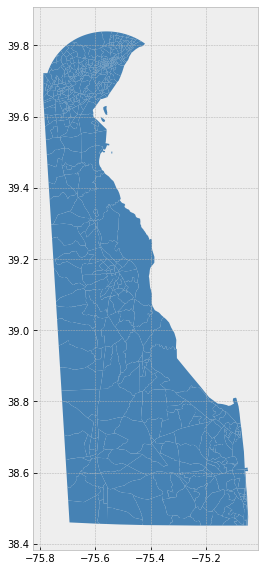

In [ ]:
# -- load the census block group (2010)
cblkgname = "/content/drive/My Drive/flooding/data/censusblock/Census_Block_Groups_2010/Census_Block_Groups_2010.shp"
decblkg_2010 = gp.read_file(cblkgname)
#decblkg_2010.head()
print(len(decblkg_2010))
decblkg_2010.plot(color="steelblue")

24115


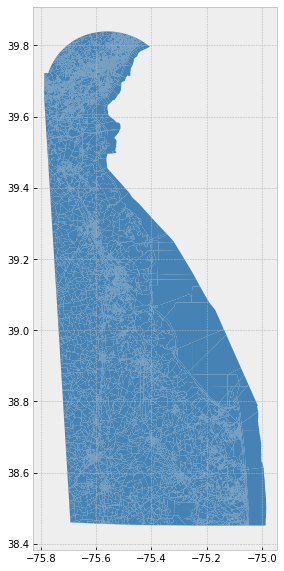

In [ ]:
# -- load the census block (2019)
cblkname = "/content/drive/My Drive/flooding/data/censusblock/tl_2019_10_tabblock10/tl_2019_10_tabblock10.shp"
decblk_2019 = gp.read_file(cblkname)
#decblkg_2019.head()
print(len(decblk_2019))
decblk_2019.plot(color="steelblue")

# Socioeconomic status (SES) data processing

[Link](https://jtleider.github.io/censusdata/example1.html)

In [ ]:
# -- lablel plot
def label_plot(plot_axis, title, x_axis_label, y_axis_label, title_weight="bold", title_size=16, axis_weight="bold", axis_size=14 ):
  plot_axis.set_title(title, weight=title_weight, size=title_size)
  plot_axis.set_xlabel(x_axis_label, weight=axis_weight, size=axis_size)
  plot_axis.set_ylabel(y_axis_label, weight=axis_weight, size=axis_size)

#--Getting standardized values
def standardize(dataframe, original_column_name:str, intended_column_name:str):
  values = dataframe[original_column_name]
  values_mean = values.mean()
  values_stdev = values.std()
  standardized_values = []
  for i in values:
    standardized_values.append((i-values_mean)/values_stdev)
  dataframe[intended_column_name] = standardized_values

In [ ]:
!pip install censusdata

     |████████████████████████████████| 23.2MB 139kB/s 
  Created wheel for censusdata: filename=CensusData-1.8-cp36-none-any.whl size=24706121 sha256=25360f18476364411b8b1a9dee62eb0362402c566a43e510291a9361475674d8
  Stored in directory: /root/.cache/pip/wheels/76/04/a7/086077b0f4dee8f4c81dc16389b84a1add31d6626f3e0985fd
Successfully built censusdata


In [ ]:
import censusdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Median household income

Question: 1% depth grid (2014) and 2014-2019 ACS data? (acs5, 2019)?


In [ ]:
censusdata.censustable('acs5', 2014, 'B19049')
censusdata.printtable(censusdata.censustable('acs5', 2014, 'B19049'))
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2014)
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '*')]), 'acs5', 2014)
income_cblkg = censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', '001'), ('block group', '*')]), ["B19049_001E"])


Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B19049_001E  | B19049. Median Household Incom | !! Median household income in the past 12 months (in 201 | int  
B19049_002E  | B19049. Median Household Incom | !! Median household income in the past 12 months (in 201 | int  
B19049_003E  | B19049. Median Household Incom | !! Median household income in the past 12 months (in 201 | int  
B19049_004E  | B19049. Median Household Incom | !! Median household income in the past 12 months (in 201 | int  
B19049_005E  | B19049. Median Household Incom | !! Median household income in the past 12 months (in 201 | int  
-------------------------------------------------------------------------------------------------------------------


Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B19049_001E  | B19049. Median Household Incom | !! Median household income in the past 12 months (in 201 | int  
B19049_002E  | B19049. Median Household Incom | !! Median household income in the past 12 months (in 201 | int  
B19049_003E  | B19049. Median Household Incom | !! Median household income in the past 12 months (in 201 | int  
B19049_004E  | B19049. Median Household Incom | !! Median household income in the past 12 months (in 201 | int  
B19049_005E  | B19049. Median Household Incom | !! Median household income in the past 12 months (in 201 | int  
-------------------------------------------------------------------------------------------------------------------
             mincome    mincome_st
count     574.000000  5.740000e+02
mean    63400.759582

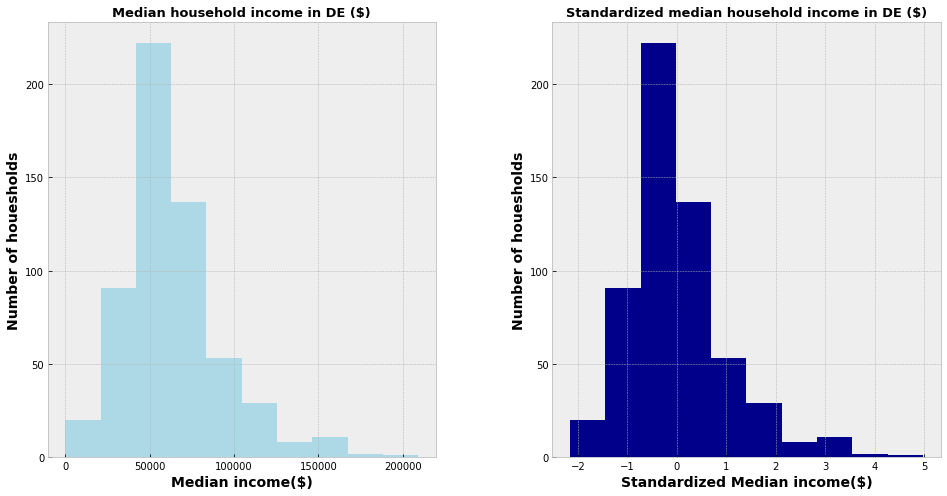

In [ ]:
# -- Median household income by census block group

censusdata.censustable('acs5', 2014, 'B19049')
censusdata.printtable(censusdata.censustable('acs5', 2014, 'B19049'))
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2014)
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '*')]), 'acs5', 2014)
income_cblkg = censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', '001'), ('block group', '*')]), ["B19049_001E"])
de_income_cblkg  = pd.concat([censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', i), ('block group', '*')]), ["B19049_001E"]) for i in ["003", "001", "005"]])
de_income_cblkg['mincome'] = de_income_cblkg["B19049_001E"].clip(0,1e9).dropna() 

#--Getting standardized values
standardize(de_income_cblkg, "mincome", "mincome_st")
de_income_cblkg = de_income_cblkg[["mincome", "mincome_st"]]
#--data description
print(de_income_cblkg.describe())
#--histogram
#de_income_cblkg.clip(0, 1e9).hist(["mincome"], bins=30)
fig_income, ax=plt.subplots(nrows=1, ncols=2, figsize=[16, 8])
plot0 = ax[0]
plot1 = ax[1]

de_income_cblkg.hist("mincome", color="lightblue", ax=plot0)
label_plot(plot0,"Median household income in DE ($)", "Median income($)", "Number of houesholds",axis_size=14, title_size=13)

de_income_cblkg.hist("mincome_st", color="darkblue", ax=plot1)
label_plot(plot1, "Standardized median household income in DE ($)", "Standardized Median income($)", "Number of houesholds",  axis_size=14, title_size=13)

fig_income.show()

## Race 

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B02001_001E  | B02001.  Race                  | Total:                                                   | int  
B02001_002E  | B02001.  Race                  | White alone                                              | int  
B02001_003E  | B02001.  Race                  | Black or African American alone                          | int  
B02001_004E  | B02001.  Race                  | American Indian and Alaska Native alone                  | int  
B02001_005E  | B02001.  Race                  | Asian alone                                              | int  
B02001_006E  | B02001.  Race                  | Native Hawaiian and Other Pacific Islander alone         | int  
B02001_007E  | B02001.  Race                  | Some other race alone                        

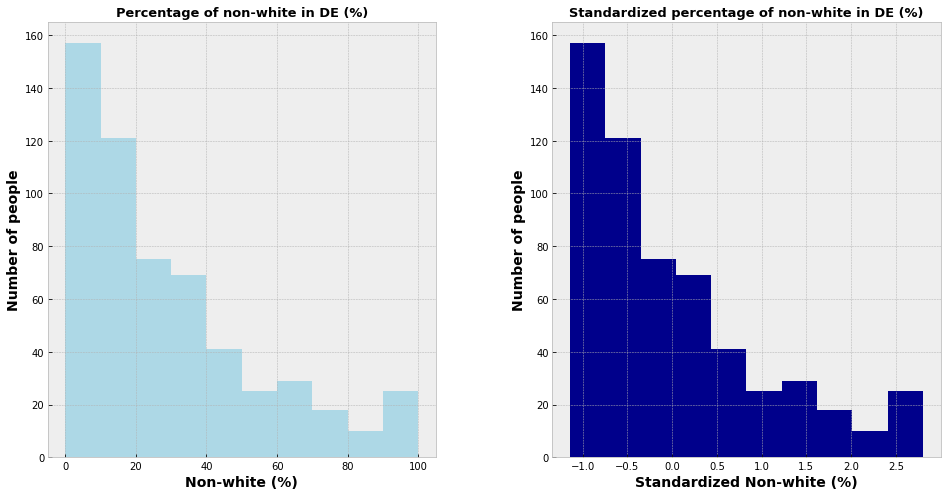

In [ ]:
# -- Racial factors (White alone / Total) by census block group
censusdata.censustable('acs5', 2014, 'B02001')
censusdata.printtable(censusdata.censustable('acs5', 2014, 'B02001'))
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2014)
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '*')]), 'acs5', 2014)
race_cblkg = censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', '001'), ('block group', '*')]), ["B02001_001E", "B02001_002E"])
de_race_cblkg  = pd.concat([censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', i), ('block group', '*')]), ["B02001_001E", "B02001_002E"]) for i in ["003", "001", "005"]])
de_race_cblkg['per_white'] = de_race_cblkg["B02001_002E"] / de_race_cblkg["B02001_001E"] * 100
de_race_cblkg['per_nonwhite'] = (de_race_cblkg["B02001_001E"] - de_race_cblkg["B02001_002E"])/de_race_cblkg["B02001_001E"] *100
de_race_cblkg = de_race_cblkg[['per_white', 'per_nonwhite']].clip(0,1e9).dropna()
#--Getting standardized values
standardize(de_race_cblkg, "per_nonwhite", "per_nonwhite_st")
de_race_cblkg = de_race_cblkg[["per_nonwhite", "per_nonwhite_st"]]
#--data description
print(de_race_cblkg.describe())
#--histogram
#de_race_cblkg.clip(0, 1e9).hist(["per_nonwhite_st"], bins=30)
fig_race, ax=plt.subplots(nrows=1, ncols=2, figsize=[16, 8])
plot0 = ax[0]
plot1 = ax[1]

de_race_cblkg.hist("per_nonwhite", color="lightblue", ax=plot0)
label_plot(plot0,"Percentage of non-white in DE (%)", "Non-white (%)", "Number of people",axis_size=14, title_size=13)

de_race_cblkg.hist("per_nonwhite_st", color="darkblue", ax=plot1)
label_plot(plot1, "Standardized percentage of non-white in DE (%)", "Standardized Non-white (%)", "Number of people",  axis_size=14, title_size=13)

fig_race.show()

## Poverty 

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B17010_001E  | B17010.  Poverty Status of Fam | Total:                                                   | int  
B17010_002E  | B17010.  Poverty Status of Fam | Income in the past 12 months below poverty level:        | int  
B17010_003E  | B17010.  Poverty Status of Fam | !! Income in the past 12 months below poverty level: Mar | int  
B17010_004E  | B17010.  Poverty Status of Fam | !! !! Income in the past 12 months below poverty level:  | int  
B17010_005E  | B17010.  Poverty Status of Fam | !! !! !! Income in the past 12 months below poverty leve | int  
B17010_006E  | B17010.  Poverty Status of Fam | !! !! !! Income in the past 12 months below poverty leve | int  
B17010_007E  | B17010.  Poverty Status of Fam | !! !! !! Income in the past 12 months below p

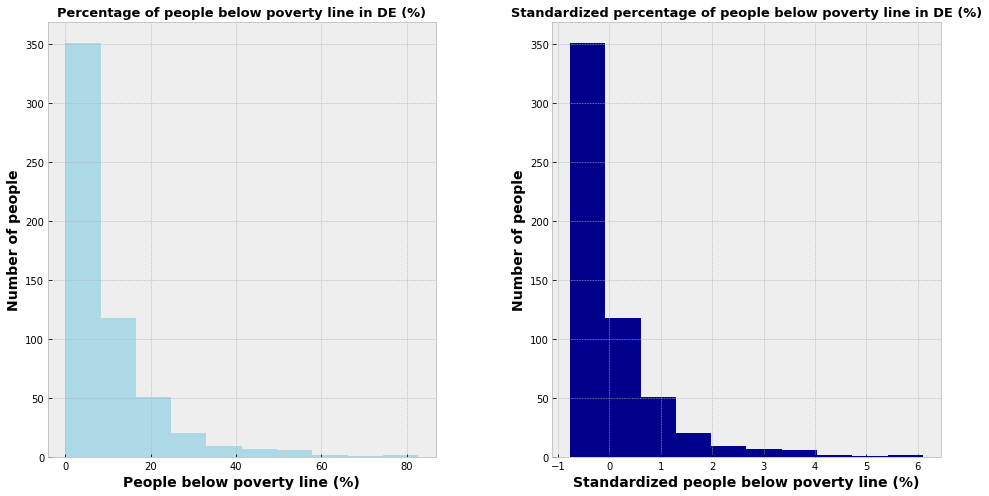

In [ ]:
# Poverty rate by census block group
censusdata.censustable('acs5', 2014, 'B17010')
censusdata.printtable(censusdata.censustable('acs5', 2014, 'B17010'))
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2014)
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '*')]), 'acs5', 2014)
poverty_cblkg = censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', '001'), ('block group', '*')]), ["B17010_001E", "B17010_002E"])
de_poverty_cblkg  = pd.concat([censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', i), ('block group', '*')]), ["B17010_001E", "B17010_002E"]) for i in ["003", "001", "005"]])
de_poverty_cblkg['per_below_povlev'] = de_poverty_cblkg["B17010_002E"] / de_poverty_cblkg["B17010_001E"] * 100
de_poverty_cblkg = de_poverty_cblkg[['per_below_povlev']].clip(0,1e9).dropna()
#--Getting standardized values
standardize(de_poverty_cblkg, 'per_below_povlev', 'per_below_povlev_st')
de_poverty_cblkg = de_poverty_cblkg[["per_below_povlev", "per_below_povlev_st"]]
#--data description
print(de_poverty_cblkg.describe())
#--histogram
#de_poverty_cblkg.clip(0, 1e9).hist(['per_below_povlev_st'], bins=30)
fig_poverty, ax=plt.subplots(nrows=1, ncols=2, figsize=[16, 8])
plot0 = ax[0]
plot1 = ax[1]

de_poverty_cblkg.hist("per_below_povlev", color="lightblue", ax=plot0)
label_plot(plot0,"Percentage of people below poverty line in DE (%)", "People below poverty line (%)", "Number of people",axis_size=14, title_size=13)

de_poverty_cblkg.hist("per_below_povlev_st", color="darkblue", ax=plot1)
label_plot(plot1, "Standardized percentage of people below poverty line in DE (%)", "Standardized people below poverty line (%)", "Number of people",  axis_size=14, title_size=13)

fig_poverty.show()

## Set GEOID & Merge dataframe

In [ ]:
# -- data processing 
# Block Group 1, Census Tract 130, New Castle County, Delaware: Summary level: 150, state:10> county:003> tract:013000> block group:1

# -- initialize GEOID container
geoids = []

# -- for each censusgeo, extract the Block Group GEOID (as type str)
for cgeo in de_income_cblkg.index:
  geoids.append(cgeo.geo[0][1] + cgeo.geo[1][1] + cgeo.geo[2][1] + cgeo.geo[3][1])

# -- set GEOID column in income DataFrame
de_income_cblkg["cblock_g_id"] = geoids

In [ ]:
# -- Race Data 

# -- initialize GEOID container
geoids = []

# -- for each censusgeo, extract the Block Group GEOID (as type str)
for cgeo in de_race_cblkg.index:
  geoids.append(cgeo.geo[0][1] + cgeo.geo[1][1] + cgeo.geo[2][1] + cgeo.geo[3][1])

# -- set GEOID column in income DataFrame
de_race_cblkg["cblock_g_id"] = geoids

In [ ]:
# -- Poverty Data 

# -- initialize GEOID container
geoids = []

# -- for each censusgeo, extract the Block Group GEOID (as type str)
for cgeo in de_poverty_cblkg.index:
  geoids.append(cgeo.geo[0][1] + cgeo.geo[1][1] + cgeo.geo[2][1] + cgeo.geo[3][1])

# -- set GEOID column in income DataFrame
de_poverty_cblkg["cblock_g_id"] = geoids

In [ ]:
# Merging with census tract geodataframe
race_income_poverty = de_income_cblkg.merge(de_race_cblkg, how="outer", left_on="cblock_g_id", right_on="cblock_g_id").merge(de_poverty_cblkg, how="outer", left_on="cblock_g_id", right_on="cblock_g_id")
demo = race_income_poverty
demo = demo[["cblock_g_id", "mincome", "mincome_st", "per_nonwhite", "per_nonwhite_st", "per_below_povlev", "per_below_povlev_st"]]
demo.head()

KeyError: ignored

In [ ]:
fig_demo, ax=plt.subplots(nrows=1, ncols=3, figsize=[24, 8])
plot0 = ax[0]
plot1 = ax[1]
plot2 = ax[2]

demo.hist('mincome', ax=plot0, bins=25)
label_plot(plot0, "Estimate of Median Income in DE", "Estimated Median Income (dollars)", "Number of household", axis_size=14, title_size=16)
demo.hist('per_nonwhite', ax=plot1, bins=25)
label_plot(plot1, "Percentage of Non-White People in DE", "Percent Not White", "Number of household", title_size=16, axis_size=14)
demo.hist("per_below_povlev", ax=plot2, bins=20)
label_plot(plot2, "Distribution of Percent Poverty in DE", "Total Percent Poverty", "Number of people", title_size=16, axis_size=14)
fig_demo.show()

# Geocoding: Raster data to Census block group shapefile, Shapefile to SES data


## Merge raster data

In [ ]:
# -- create a DataFrame of the depth grid
df_dgrid_1c = pd.DataFrame(columns=["lat", "lon", "dep"])
df_dgrid_3c = pd.DataFrame(columns=["lat", "lon", "dep"])
df_dgrid_5c = pd.DataFrame(columns=["lat", "lon", "dep"])

In [ ]:
# -- renaming for ease of use...
dep_grid_1c = arr1C_Cst_Dpth01pct
dep_grid_3c = arr3C_Cst_Dpth01pct
dep_grid_5c = arr5C_Cst_Dpth01pct

In [ ]:
# -- assign column values
df_dgrid_1c["lat"] = lat_grid_1c.flatten()
df_dgrid_1c["lon"] = lon_grid_1c.flatten()
df_dgrid_1c["dep"] = dep_grid_1c.flatten()

df_dgrid_3c["lat"] = lat_grid_3c.flatten()
df_dgrid_3c["lon"] = lon_grid_3c.flatten()
df_dgrid_3c["dep"] = dep_grid_3c.flatten()

df_dgrid_5c["lat"] = lat_grid_5c.flatten()
df_dgrid_5c["lon"] = lon_grid_5c.flatten()
df_dgrid_5c["dep"] = dep_grid_5c.flatten()

In [ ]:
def make_point(x):
  return Point(x["lon"], x["lat"])
  make_point(df_dgrid.iloc[0])

In [ ]:
# -- make points
df_dgrid_1c["geometry"] = df_dgrid_1c.apply(make_point, axis=1)
df_dgrid_3c["geometry"] = df_dgrid_3c.apply(make_point, axis=1)
df_dgrid_5c["geometry"] = df_dgrid_5c.apply(make_point, axis=1)

In [ ]:
# -- merge dataframe by column names
df_dgrid = pd.concat([df_dgrid_1c, df_dgrid_3c, df_dgrid_5c])

In [ ]:
# -- convert to geodataframe
df_dgrid_1c = gp.GeoDataFrame(df_dgrid_1c)
df_dgrid_3c = gp.GeoDataFrame(df_dgrid_3c)
df_dgrid_5c = gp.GeoDataFrame(df_dgrid_5c)
# -- merge geodataframe
df_dgrid = gp.GeoDataFrame(df_dgrid)
#--plot
df_dgrid.plot("dep")

## Geospatial join raster data to census tract shapefile

In [ ]:
# -- Perform a spatial join between the Raster data and Census block shape file
df_dgrid_1c_decblkg_2010 = gp.sjoin(df_dgrid_1c, decblkg_2010)
df_dgrid_3c_decblkg_2010 = gp.sjoin(df_dgrid_3c, decblkg_2010)
df_dgrid_5c_decblkg_2010 = gp.sjoin(df_dgrid_5c, decblkg_2010)

In [ ]:
# -- Merge county level data to make state level data 
df_dgrid_cblkg = pd.concat([df_dgrid_1c_decblkg_2010, df_dgrid_3c_decblkg_2010,df_dgrid_5c_decblkg_2010])
df_dgrid_cblkg["dep_cl"] = df_dgrid_cblkg["dep"].clip(0, 1e6)
df_dgrid_cblkg.head()

In [ ]:
# -- Plot the census tract
fig_df_dgrid_cblkg, ax=plt.subplots(nrows=1, ncols=4, figsize=[26, 8])
plot0 = ax[0]
plot1 = ax[1]
plot2 = ax[2]
plot3 = ax[3]

df_dgrid_3c_decblkg_2010.plot("GEOID10", cmap="flag", ax=plot0)
label_plot(plot0, "Census Block Group \nin Coastal Area, New Castle County", "Latitude", "Longitude", axis_size=14, title_size=13)

df_dgrid_1c_decblkg_2010.plot("GEOID10", cmap="flag", ax=plot1)
label_plot(plot1, "Census Block Group \nin Coastal Area, Kent County", "Latitude", "Longitude", axis_size=14, title_size=13)

df_dgrid_5c_decblkg_2010.plot("GEOID10", cmap="flag", ax=plot2)
label_plot(plot2, "Census Block Group \nin Coastal Area, Sussex County", "Latitude", "Longitude", axis_size=14, title_size=13)

df_dgrid_cblkg.plot("GEOID10", cmap="flag", ax=plot3)
label_plot(plot3, "Census Block Group \nin Coastal Area, Delaware", "Latitude", "Longitude", axis_size=14, title_size=13)

fig_df_dgrid_cblkg.show()

In [ ]:
# -- Using "groupby" GEOID to get the average number of depth (1% annual chance flood)
df_dgrid_g = df_dgrid_cblkg.groupby("GEOID10").mean().reset_index()
cols = ["GEOID10", "lat", "lon", "dep", "dep_cl"]
df_dgrid_sub = df_dgrid_g[cols]
df_dgrid_sub

In [ ]:
# -- Merge back with the original GEOID10
decblkg_2010_df_dgrid_sub = decblkg_2010.merge(df_dgrid_sub, on="GEOID10")
cols = ["GEOID10", "lat", "lon", "dep", "dep_cl", "geometry"]
decblkg_2010_df_dgrid_sub_cols = decblkg_2010_df_dgrid_sub[cols]
decblkg_2010_df_dgrid_sub_cols 

In [ ]:
print(decblkg_2010_df_dgrid_sub_cols["dep_cl"].min())
print(decblkg_2010_df_dgrid_sub_cols["dep_cl"].max())

In [ ]:
decblkg_2010_df_dgrid_sub_cols.plot("dep_cl", legend=True, vmax=5)

## Merge geodata to social factors data (census tract)

In [ ]:
# -- Merge geodata to demographic factors data
decblkg_2010_df_dgrid_sub_cols_demo = decblkg_2010_df_dgrid_sub_cols.merge(demo, left_on="GEOID10", right_on="cblockgid",how="left")

# -- Rename dataset
data = decblkg_2010_df_dgrid_sub_cols_demo

# -- Reframe dataset
cols = ["cblockgid", "geometry", "lat", "lon", 
        "dep", "dep_cl",
        "mincome", "mincome_st", 
        "per_nonwhite", "per_nonwhite_st",  
        "per_below_povlev", "per_below_povlev_st"]
data_sub = data[cols]
data_sub.columns = ["cblockgid", "geometry", "lat", "lon", 
                    "dep", "dep_cl", "mincome", "mincome_st", "per_nonwhite", "per_nonwhite_st", "per_below_povlev", "per_below_povlev_st"]
data_sub = data_sub.fillna(0)
data_sub

In [ ]:
# -- Plot
fig_data_sub, ax=plt.subplots(nrows=1, ncols=2, figsize=[11, 8])
plot0 = ax[0]
plot1 = ax[1]

data_sub.plot("dep", ax=plot0, legend=True)
label_plot(plot0, "1% Annual Chance Flood \nby Census Tract \nin Coastal Area, DE [Feet]", "Annual 1% chance flood [Feet]", "Number of Census Tracts", axis_size=12, title_size=13)

data_sub.plot("dep_cl", ax=plot1, legend=True)
label_plot(plot1, "1% Annual Chance Flood \nby Census Tract \nin Coastal Area, DE [Feet]", "Standardized Annual 1% \nchance flood [Feet]", "Number of Census Tracts", axis_size=12, title_size=13)

fig_data_sub.show()

In [ ]:
# -- Plot
fig_data_sub, ax=plt.subplots(nrows=1, ncols=4, figsize=[23, 8])
plot0 = ax[0]
plot1 = ax[1]
plot2 = ax[2]
plot3 = ax[3]

data_sub.plot("dep_cl", ax=plot0, legend=True)
label_plot(plot0, "1% Annual Chance Flood \nby Census Tract \nin Coastal Area, DE [Feet]", "1% Annual chance flood [Feet]", "Number of Census Block Groups", axis_size=12, title_size=13)

data_sub.plot("mincome_st", ax=plot1, legend=True)
label_plot(plot1, "Estimate of Median Income \nby Census Tract \nin Coastal Area, DE [$]", "Standardized Estimated \nMedian Income [$]", "Number of Census Block Groups", axis_size=12, title_size=13)

data_sub.plot("per_nonwhite_st", ax=plot2, legend=True)
label_plot(plot2, "Percentage of Non-White People \nby Census Tract \nin Coastal Area, DE [%]", "Standardized Percent \nNon-White [%]", "Number of Census Block Groups", axis_size=12, title_size=13)

data_sub.plot("per_below_povlev_st", ax=plot3, legend=True)
label_plot(plot3, "Percentage of Below Poverty Level \nby Census Tract \nin Coastal Area, DE [%]", "Standardized Percent \nBelow Poverty Level [%]", "Number of Census Block Groups", title_size=12, axis_size=13)

fig_data_sub.show()

# Correlation

In [ ]:
# correlation 

fig_data_sub_cor_st, ax = plt.subplots(nrows=1, ncols=3, figsize=[20, 6])
plot0 = ax[0]
plot1 = ax[1]
plot2 = ax[2]

# -- GGD: let's concentrate only on place where there will be flood
data_sub_fl = data_sub[data_sub["dep_cl"] > 0]

#plot 0
plot0.scatter(data_sub_fl["mincome_st"], data_sub_fl["dep_cl"])
label_plot(plot0, "Relationship Between Median Income \nand 1% Annual Chance Flood \nfor Census Tracts", "Estimated Median Income", "1% Annual Chance Flood", title_size=14, axis_size=10)
#plot 1
plot1.scatter(data_sub_fl["per_nonwhite_st"], data_sub_fl["dep_cl"])
label_plot(plot1, "Relationship Between Race (Percent Not White) \nand 1% Annual Chance Flood \nfor Census Tracts", "Percent of Population that Is Not White", "1% Annual Chance Flood", title_size=14, axis_size=10)
#plot 2
plot2.scatter(data_sub_fl["per_below_povlev_st"], data_sub_fl["dep_cl"])
label_plot(plot2, "Relationship Between Poverty Rates \nand 1% Annual Chance Flood \nfor Census Tracts", "Percent of People Below the Poverty Line", "1% Annual Chance Flood", title_size=14, axis_size=10)

fig_data_sub_cor_st.subplots_adjust(wspace=.25, hspace=.4)
fig_data_sub_cor_st.show()

There's a couple of different ways of approaching this:

  1. does the depth depend on the socio-econ/demographic (SED)
  2. is the population of flooded areas different than the population of non-flooded areas?
  3. given a flood, does the affected area have different SED characteristics than average?

In [ ]:
# -- set a threshold for "flooded"
thr = 0.01

# -- flooded census tracts
data_sub_fl = data_sub[data_sub["dep_cl"] >= thr]

# -- not-flooded census tracts
data_sub_nf = data_sub[data_sub["dep_cl"] < thr]

# -- make histograms
fig, ax = plt.subplots(1, 3, figsize=[25, 5])
ax[0].hist(data_sub_fl["mincome"], range=[0, 100000], bins=30, alpha=0.5, label="flooded")
ax[0].hist(data_sub_nf["mincome"], range=[0, 100000], bins=30, alpha=0.5, label="not flooded")
ax[0].legend()

ax[1].hist(data_sub_fl["per_nonwhite"], range=[0, 100], bins=30, alpha=0.5, label="flooded")
ax[1].hist(data_sub_nf["per_nonwhite"], range=[0, 100], bins=30, alpha=0.5, label="not flooded")
ax[1].legend()

ax[2].hist(data_sub_fl["per_below_povlev"], range=[0, 100], bins=30, alpha=0.5, label="flooded")
ax[2].hist(data_sub_nf["per_below_povlev"], range=[0, 100], bins=30, alpha=0.5, label="not flooded")
ax[2].legend()

In [ ]:
from scipy import stats
from scipy.stats import ks_2samp

x1 = data_sub_fl["mincome"]
y1 = data_sub_nf["mincome"]
print(ks_2samp(x1, y1))

x2 = data_sub_fl["per_nonwhite"]
y2 = data_sub_nf["per_nonwhite"]
print(ks_2samp(x2, y2))

x3 = data_sub_fl["per_below_povlev"]
y3 = data_sub_nf["per_below_povlev"]
print(ks_2samp(x3, y3))

---

**GGD: streamline...**

In [ ]:
# -- initialize timer
t00 = time.time()

# -- set filename : 1% depth / DE / coastal area 

print("reading Tiffs...")

# -- Kent (10001C)
fname1C_Cst_Dpth01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Kent/FRD_10001C_Coastal_GeoTIFFS_20140502/10001C_Coastal_CstDpth01pct.tif"

# -- New Castle (10003C)
fname3C_Cst_Dpth01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_10003C_Coastal_GeoTIFFS_20140516/10003C_Coastal_CstDpth01pct.tif"

# -- Sussex (1005C)
fname5C_Cst_Dpth01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Sussex/FRD_10005C_Coastal_GeoTIFFS_20140509/10005C_Coastal_CstDpth01pct.tif"

# -- create and read in a raster : 1% depth / DE / coastal area  
rast1C_Cst_Dpth01pct = gdal.Open(fname1C_Cst_Dpth01pct, GA_ReadOnly)
rast3C_Cst_Dpth01pct = gdal.Open(fname3C_Cst_Dpth01pct, GA_ReadOnly)
rast5C_Cst_Dpth01pct = gdal.Open(fname5C_Cst_Dpth01pct, GA_ReadOnly)

print("extracting to array...")
t0 = time.time()

# -- extract raster to array : 1% depth / DE / coastal area  
samp=50
arr1C_Cst_Dpth01pct = rast1C_Cst_Dpth01pct.ReadAsArray()[::samp, ::samp]
arr3C_Cst_Dpth01pct = rast3C_Cst_Dpth01pct.ReadAsArray()[::samp, ::samp]
arr5C_Cst_Dpth01pct = rast5C_Cst_Dpth01pct.ReadAsArray()[::samp, ::samp]

print("  arrays extracted in {0}s".format(time.time() - t0))

print("loading census block group shapes...")
t0 = time.time()

# -- load the Census Block Group shapes
cblkname = "/content/drive/My Drive/flooding/data/censusblock/Census_Block_Groups_2010/Census_Block_Groups_2010.shp"
dect_2010 = gp.read_file(cblkname)

print("  loaded in {0}s".format(time.time() - t0))

print("generating depth DataFrame...")

# -- create a DataFrame of the depth grid
df_dgrid_1c = pd.DataFrame(columns=["lat", "lon", "dep"])
df_dgrid_3c = pd.DataFrame(columns=["lat", "lon", "dep"])
df_dgrid_5c = pd.DataFrame(columns=["lat", "lon", "dep"])

print("  extracting metadata for Kent")

# -- Kent -- #

# -- read in the meta data file as list of strings: Kent county 
mname1c = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Kent/FRD_10001C_Coastal_GeoTIFFS_20140502/10001C_Coastal_CstDpth01pct.tif.xml"
fopen = open(mname1c, "r")
lines = [i for i in fopen]
fopen.close()

# -- get lat lon meta data
for line in lines:
  if "<westBL Sync=\"TRUE\">" in line:
    westBL = float(line.split("<westBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<eastBL Sync=\"TRUE\">" in line:
    eastBL = float(line.split("<eastBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<northBL Sync=\"TRUE\">" in line:
    northBL = float(line.split("<northBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<southBL Sync=\"TRUE\">" in line:
    southBL = float(line.split("<southBL Sync=\"TRUE\">")[2].split("<")[0])

# -- get number of rows and cols
nrows1c, ncols1c = arr1C_Cst_Dpth01pct.shape

# -- define upperleft and resolution
ul_r = northBL
ul_c = westBL
dr   = (northBL - southBL) / nrows1c
dc   = (eastBL - westBL) / ncols1c

# -- generate a grid of row and col indices
cols1c, rows1c = np.meshgrid(np.arange(ncols1c), np.arange(nrows1c))

lat_grid_1c = ul_r - rows1c * dr
lon_grid_1c = ul_c + cols1c * dc


# -- New Castle -- #
print("  extracting metadata for New Castle")

# -- read in the meta data file as list of strings: New Castle county
mname3c = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_10003C_Coastal_GeoTIFFS_20140516/10003C_Coastal_CstDpth01pct.tif.xml"
fopen = open(mname3c, "r")
lines = [i for i in fopen]
fopen.close()

# -- get lat lon meta data
for line in lines:
  if "<westBL Sync=\"TRUE\">" in line:
    westBL = float(line.split("<westBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<eastBL Sync=\"TRUE\">" in line:
    eastBL = float(line.split("<eastBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<northBL Sync=\"TRUE\">" in line:
    northBL = float(line.split("<northBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<southBL Sync=\"TRUE\">" in line:
    southBL = float(line.split("<southBL Sync=\"TRUE\">")[2].split("<")[0])

# -- get number of rows and cols
nrows3c, ncols3c = arr3C_Cst_Dpth01pct.shape

# -- define upperleft and resolution
ul_r = northBL
ul_c = westBL
dr   = (northBL - southBL) / nrows3c
dc   = (eastBL - westBL) / ncols3c

# -- generate a grid of row and col indices
cols3c, rows3c = np.meshgrid(np.arange(ncols3c), np.arange(nrows3c))

lat_grid_3c = ul_r - rows3c * dr
lon_grid_3c = ul_c + cols3c * dc


# -- Sussex -- #

print("  extracting metadata for Sussex")

# -- read in the meta data file as list of strings: New Castle county
mname5c = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Sussex/FRD_10005C_Coastal_GeoTIFFS_20140509/10005C_Coastal_CstDpth01pct.tif.xml"
fopen = open(mname5c, "r")
lines = [i for i in fopen]
fopen.close()

# -- get lat lon meta data
for line in lines:
  if "<westBL Sync=\"TRUE\">" in line:
    westBL = float(line.split("<westBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<eastBL Sync=\"TRUE\">" in line:
    eastBL = float(line.split("<eastBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<northBL Sync=\"TRUE\">" in line:
    northBL = float(line.split("<northBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<southBL Sync=\"TRUE\">" in line:
    southBL = float(line.split("<southBL Sync=\"TRUE\">")[2].split("<")[0])

# -- get number of rows and cols
nrows5c, ncols5c = arr5C_Cst_Dpth01pct.shape

# -- define upperleft and resolution
ul_r = northBL
ul_c = westBL
dr   = (northBL - southBL) / nrows5c
dc   = (eastBL - westBL) / ncols5c

# -- generate a grid of row and col indices
cols5c, rows5c = np.meshgrid(np.arange(ncols5c), np.arange(nrows5c))

lat_grid_5c = ul_r - rows5c * dr
lon_grid_5c = ul_c + cols5c * dc


# -- renaming for ease of use...
dep_grid_1c = arr1C_Cst_Dpth01pct
dep_grid_3c = arr3C_Cst_Dpth01pct
dep_grid_5c = arr5C_Cst_Dpth01pct

print("  assigning column values...")

# -- assign column values
df_dgrid_1c["lat"] = lat_grid_1c.flatten()
df_dgrid_1c["lon"] = lon_grid_1c.flatten()
df_dgrid_1c["dep"] = dep_grid_1c.flatten()

df_dgrid_3c["lat"] = lat_grid_3c.flatten()
df_dgrid_3c["lon"] = lon_grid_3c.flatten()
df_dgrid_3c["dep"] = dep_grid_3c.flatten()

df_dgrid_5c["lat"] = lat_grid_5c.flatten()
df_dgrid_5c["lon"] = lon_grid_5c.flatten()
df_dgrid_5c["dep"] = dep_grid_5c.flatten()


print("generating GeoDataFrame...")

def make_point(x):
  return Point(x["lon"], x["lat"])

print("  creating geometry...")
t0 = time.time()

# -- make points
df_dgrid_1c["geometry"] = df_dgrid_1c.apply(make_point, axis=1)
df_dgrid_3c["geometry"] = df_dgrid_3c.apply(make_point, axis=1)
df_dgrid_5c["geometry"] = df_dgrid_5c.apply(make_point, axis=1)

print("  geometry created in {0}s".format(time.time() - t0))

print("merging and converting to GeoDataFrame...")

# -- merge dataframe by column names
df_dgrid = pd.concat([df_dgrid_1c, df_dgrid_3c, df_dgrid_5c])

# -- convert to geodataframe
df_dgrid_1c = gp.GeoDataFrame(df_dgrid_1c)
df_dgrid_3c = gp.GeoDataFrame(df_dgrid_3c)
df_dgrid_5c = gp.GeoDataFrame(df_dgrid_5c)

# -- merge geodataframe
df_dgrid = gp.GeoDataFrame(df_dgrid)

print("Spatial join on raster and Census blocks...")
t0 = time.time()

# -- Perform a spatial join between the Raster data and Census block shape file
df_dgrid_1c_dect_2010 = gp.sjoin(df_dgrid_1c, dect_2010)
df_dgrid_3c_dect_2010 = gp.sjoin(df_dgrid_3c, dect_2010)
df_dgrid_5c_dect_2010 = gp.sjoin(df_dgrid_5c, dect_2010)

# -- Merge county level data to make state level data 
df_dgrid_cblk = pd.concat([df_dgrid_1c_dect_2010, df_dgrid_3c_dect_2010,df_dgrid_5c_dect_2010])
df_dgrid_cblk["dep_cl"] = df_dgrid_cblk["dep"].clip(0, 1e6)

print("  finished in {0}s".format(time.time() - t0))

print("merging with Census Block GeoDataFrame")

# -- Using "groupby" GEOID to get the average number of depth (1% annual chance flood)
df_dgrid_g = df_dgrid_cblk.groupby("GEOID10").mean().reset_index()
cols = ["GEOID10", "lat", "lon", "dep", "dep_cl"]
df_dgrid_sub = df_dgrid_g[cols]

# -- Merge back with the original GEOID10
dect_2010_df_dgrid_sub = dect_2010.merge(df_dgrid_sub, on="GEOID10")
cols = ["GEOID10", "lat", "lon", "dep", "dep_cl", "geometry"]
dect_2010_df_dgrid_sub_cols = dect_2010_df_dgrid_sub[cols]

# -- alert user of total time
print("Process completed in {0}s".format(time.time() - t00))

print("plotting result...")
dect_2010_df_dgrid_sub_cols.plot("dep_cl", legend=True, vmax=5)